
# This Code probe the effects of manual data extraction
##(recovering data from papers)


#### Coded by Leonardo da Silva Garcia Leite, Jan 2025
#### Dr. Aurora Clark's Group - University of Utah






In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this is for the loess fitting
import statsmodels.api as sm
from sklearn import linear_model



# This configures the plots
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.ticker
from matplotlib.ticker import MaxNLocator

# Adjusting tick label size
#plt.tick_params(axis='both', labelsize=25)  # 20 is an example size; adjust as needed.


# Set maximum number of ticks to 5
mpl.ticker.MaxNLocator.default_params['nbins'] = 5  # Globally set maximum ticks
## Set maximum number of ticks to 5
#axii.xaxis.set_major_locator(MaxNLocator(5))  # For x-axis
#axii.yaxis.set_major_locator(MaxNLocator(5))  # For y-axis
#

#second try to ajust sizes of parameters


#second try to ajust sizes of parameters


fontScaling= 1

# Desired font sizes and tick size
label_fontsize = fontScaling*12  # pt
title_fontsize = fontScaling*14  # pt
tick_fontsize = fontScaling*10   # pt (you can adjust this as needed)
legend_fontsize = fontScaling*10
desired_width = 4.2#8.4#4.2 #6    # inches (adjust as needed)  , 1 inch = 72 points (pt)
border_thickness = 1.5 #t
tick_thickness = 1.5 # pt
scatter_size = 50
plot_linewidth = 1.0

# Use mpl.update to apply rcParams globally
mpl.rcParams.update({
    'text.usetex': False,  # Use LaTeX for text rendering
    'font.size': label_fontsize,  # Base font size for labels
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': label_fontsize,  # Label font size
    'xtick.labelsize': tick_fontsize,  # x-axis tick label size
    'ytick.labelsize': tick_fontsize,  # y-axis tick label size
    'xtick.major.width': tick_thickness,
    'ytick.major.width': tick_thickness,
    'xtick.direction': 'in',  # Move x-axis ticks inside
    'ytick.direction': 'in',  # Move y-axis ticks inside 
    'legend.fontsize': legend_fontsize,     # Legend font size
    'axes.linewidth': border_thickness,  # Border thickness for the entire plot
    'figure.figsize': [desired_width, desired_width * 0.75]  # Aspect ratio
})

print('reference font value:', label_fontsize/fontScaling,' font scaling:', fontScaling,' effective font size:',label_fontsize )
#xtick.minor.width



from sklearn.linear_model import LinearRegression



reference font value: 12.0  font scaling: 1  effective font size: 12


In [ ]:
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df


,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


In [25]:
##Calculates the D values if the Extraction is known...
def Dacid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return (cacidorg)/(cacid-cacidorg)


df['Dacid (calc)'] = df.apply(Dacid, axis=1)


In [26]:
#calculate log of some fields..
def logDacid(row):
    Dacid = row['Dacid (calc)']
    if (Dacid>0) :
        return np.log10(Dacid)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log10(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log10(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    if (Extractantini > 0) :
        #print('DHNO3',DHNO3, 'HNO3org:', HNO3org, ' at row: ', row.name)
        return np.log10(Extractantini)


df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDacid'] = df.apply(logDacid, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)


In [27]:
# to calculate kh for fixed acidity guoxin style
def logAcidOrg_aq(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)

def logExtractant_AcidOrg(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cextrac - cacidorg)>0 ):
        return np.log10(cextrac-cacidorg)


# to calculate kh for fixed [DGA]
def logAcidOrg_aqExtractant(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac) and (cacidorg>0)):
        return np.log10(cacidorg)-np.log10(cextrac-cacidorg)

def logAcidOrgAcid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']

    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacid-cacidorg)


df['logAcidOrg_aq'] = df.apply(logAcidOrg_aq, axis=1)
df['logExtractant_AcidOrg'] = df.apply(logExtractant_AcidOrg, axis=1)

df['logAcidOrg_aqExtractant'] = df.apply(logAcidOrg_aqExtractant, axis=1)
df['logAcidOrgAcid'] = df.apply(logAcidOrgAcid, axis=1)

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_75001/1665782252.py:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_75001/1665782252.py:20: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_75001/1665782252.py:27: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacid-cacidorg)


# Plot data space

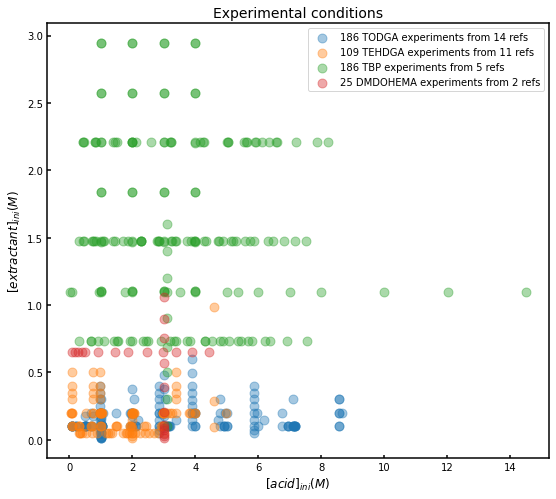

In [28]:
m1 = ['webplotM', 'plotdigitizerM', 'graphreaderM','table']

fig, axii = plt.subplots()



dftodga = df[(df['has ions?']==0) & (df['has PM?'] == 0) & (df['CacidOrg (M)']>0) & (df['ExtractantName'] == 'TODGA')
            & (df['extractionRun'].isin(m1))  & (df['Third phase'] != 1)
            #& ( df['logExtractant_AcidOrg'].isna()== False)
            ].copy()
axii.scatter(x=dftodga['Cacid (M)'], y=dftodga['Cextractant (M)'], 
             label=str(len(dftodga.index))+ ' TODGA experiments from '+str(len(dftodga['ref citation'].unique()))+' refs', alpha=0.4, s=80)



dftehdga = df[(df['has ions?']==0) & (df['has PM?'] == 0) & (df['CacidOrg (M)']>0) & (df['ExtractantName'] == 'TEHDGA')
             &  (df['extractionRun'].isin(m1))].copy()
axii.scatter(x=dftehdga['Cacid (M)'], y=dftehdga['Cextractant (M)'],
             label=str(len(dftehdga.index))+ ' TEHDGA experiments from '+str(len(dftehdga['ref citation'].unique()))+' refs', alpha=0.4, s=80)

dftbp = df[(df['has ions?']==0) & (df['has PM?'] == 0) & (df['CacidOrg (M)']>0) & (df['ExtractantName'] == 'TBP')
          & (df['extractionRun'].isin(m1))].copy()
axii.scatter(x=dftbp['Cacid (M)'], y=dftbp['Cextractant (M)'],
             label=str(len(dftbp.index))+ ' TBP experiments from '+str(len(dftbp['ref citation'].unique()))+' refs', alpha=0.4, s=80)

dfdmdohema = df[(df['has ions?']==0) & (df['has PM?'] == 0) & (df['CacidOrg (M)']>0) & (df['ExtractantName'] == 'DMDOHEMA')
          #& (df['extractionRun'].isin(m1))
               ].copy()
axii.scatter(x=dfdmdohema['Cacid (M)'], y=dfdmdohema['Cextractant (M)'],
             label=str(len(dfdmdohema.index))+ ' DMDOHEMA experiments from '+str(len(dfdmdohema['ref citation'].unique()))+' refs', alpha=0.4, s=80)


axii.set_ylabel(r'$[extractant]_{ini} (M)$')
axii.set_xlabel(r'$[acid]_{ini} (M)$')


axii.set_title("Experimental conditions",fontsize=14)
plt.legend()
fig.set_size_inches(9.0, 8.0, forward=True)


In [42]:
''' selecting only data that are in good o format to be fitted'''

df1 = df.loc[ 
              (df['Cacid (M)'] < 10) & (df['has ions?'] ==0) & (df['has PM?'] ==0)
              &(df['CacidOrg (M)']>0)
              & (df['logExtractant_AcidOrg'].isna()== False)

].copy()

Number of usefull fittings:  0
number of points: 9
{'tachimori2002'}
1


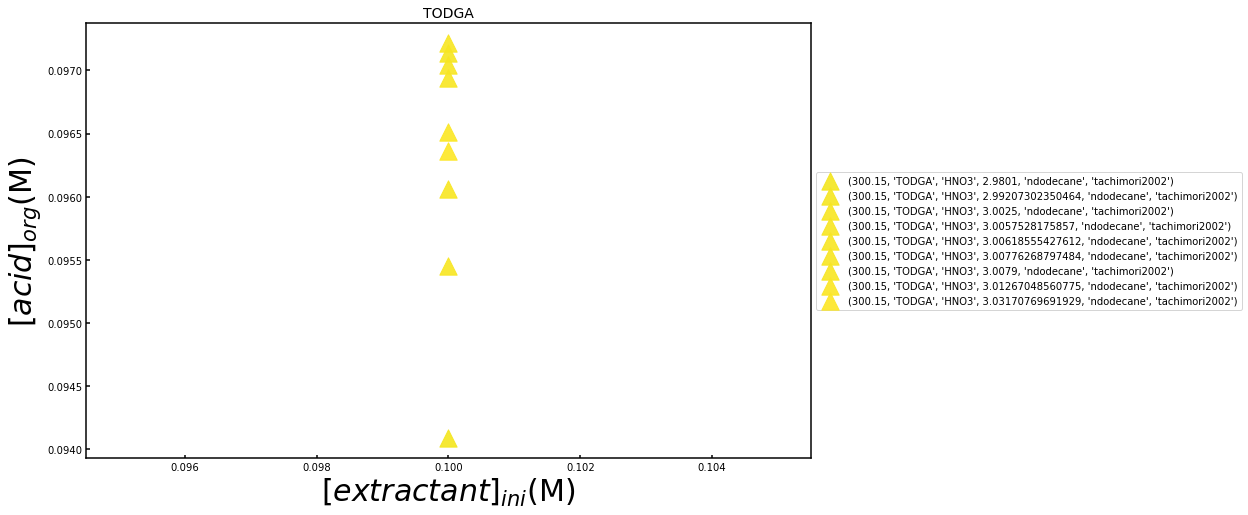

In [50]:
'''  this clusters data to analyze fixed acid vary extractatn.'''
#this block just select the points from different extraction softwares and assing a 'color' to them in the dataframe.
#s1 = extractation1, extraction2, extraction3 with the same software.

s1 = ['webplot1','webplot2','webplot3']
s2 = ['plotdigitizer1','plotdigitizer2','plotdigitizer3']
s3 = ['graphreader1','graphreader2','graphreader3']#,'table']
m1 = ['webplotM', 'plotdigitizerM', 'graphreaderM']#,'table']

dfR = df1.loc[
    
    (df1['ExtractantName'] == 'TODGA')
    #& (df1['Cextractant (M)'] > 0.098)  &(df1['Cextractant (M)'] < 0.12)
     #& df1['ref citation'].isin(['Bell2012'])                          #this is for percentual error
    #& (df1['SolventName'] != 'ndodecane')
    & df1['ref citation'].isin(['tachimori20022','tachimori2002', 'tachimori20023'])
    # & df1['ref citation'].isin(['Bell2012','Bell20122','Bell20123','Bell20120'])
    #& df1['ref citation'].isin(['chen2020','chen20202', 'chen20203'])
   # & df1['ref citation'].isin(['guoxin2010','guoxin20102','guoxin20103','guoxin2010M'])
     & (df1['Cacid (M)'] > 2.3 )  #remove this to see full sequencing
     & (df1['Cextractant (M)'] < 0.8 ) 

    & (df1['extractionRun'].isin(s1+s2+s3))                                 #this is for percentual error, remove table
                    #['graphreader1','graphreader2','graphreader3']))

].copy()

#separate the differente extraction softwares into colors
color_map_dig = {
    'webplot1': 'red', 'webplot2': 'red', 'webplot3': 'red', 'webplot4': 'red',
    'plotdigitizer1': 'blue', 'plotdigitizer2': 'blue', 'plotdigitizer3': 'blue',
    'graphreader1': 'green', 'graphreader2': 'green', 'graphreader3': 'green'
}
dfR['color'] = dfR['extractionRun'].map(color_map_dig)

markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for temperature values


fig, axii = plt.subplots()

k2 = 0
paperNames = []

# dfR['extractionRun'],
for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['ExtractantName'],dfR['AcidName'],dfR['Cacid (M)'], dfR['SolventName'], dfR['ref citation']]):

        #do some fitting with the data
        x = d['Cextractant (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]
        


        if(len(x)>0):    

       
            paperNames.append(g[-1])
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            # Normalize temperature values to [0, 1] for colormap 
            #normalized_temps = (d['Temp (K)'] - dfR['Temp (K)'].min()) / (dfR['Temp (K)'].max() - dfR['Temp (K)'].min())
            
            normalized_temps = (d['Cacid (M)']/dfR['Cacid (M)'].max())
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)
            

            axii.plot(x,y,color='black', alpha=0.05)
            axii.scatter(x,y, label = f'{g}', marker=markerget,c=colors,#c=d['color'], #  #
                         s=100*d['Cacid (M)'].values, alpha=0.9)
            

            axii.set_title(g[1])
            axii.set_xlabel(r'$[extractant]_{ini}$(M)', fontsize='30')
            axii.set_ylabel(r'$[acid]_{org}$(M)', fontsize='30')


print('Number of usefull fittings: ', k2)
print('number of points:',len(dfR))
print(set(paperNames))
print(len(set(paperNames)))

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
fig.set_size_inches(13.0, 8.0, forward=True)
plt.show()




    Cacid (M)  CacidOrg (M)   extractionRun color  sequence
54   3.007763      0.095453  plotdigitizer1  blue       3.0
51   3.012670      0.096516  plotdigitizer2  blue       3.0
48   3.031708      0.096365  plotdigitizer3  blue       3.0
What is the percent error  2.7410023491365
    Cacid (M)  CacidOrg (M) extractionRun  color  sequence
42     2.9801      0.094084  graphreader1  green       3.0
29     3.0025      0.097042  graphreader3  green       3.0
32     3.0079      0.097217  graphreader2  green       3.0
What is the percent error  8.449472494034351
    Cacid (M)  CacidOrg (M) extractionRun color  sequence
60   2.992073      0.097140      webplot3   red       3.0
66   3.005753      0.096062      webplot1   red       3.0
63   3.006186      0.096938      webplot2   red       3.0
What is the percent error  2.695359988993708
Number of usefull fittings:  0
[]


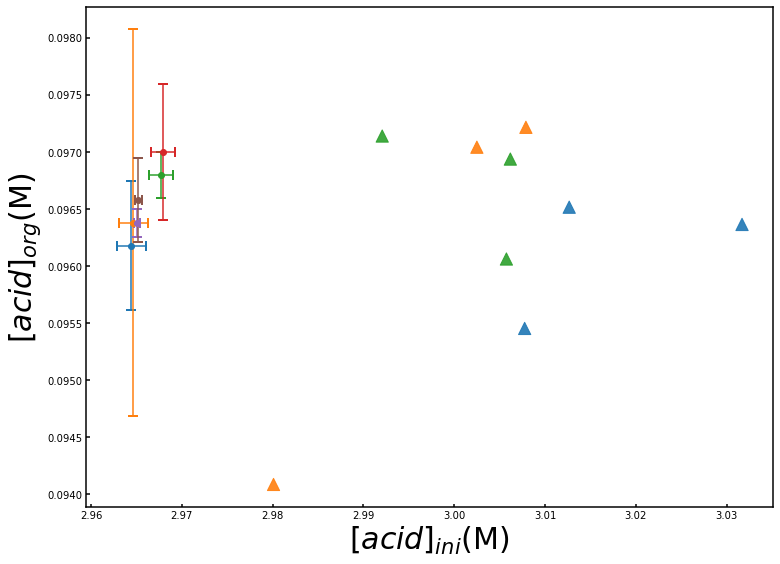

In [51]:
'''  this is analysis on the human errors introduced by the measurements for each software'''


markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for temperature values



fig, axii = plt.subplots()


k = -1
k2 = 0

paperNames = []

# Initialize lists to store results
colors_vec = []
sequence = []
mean_x_actuals= []
dev_x_actuals= []
mads_x = []
mean_y_actuals= []
dev_y_actuals= []
mads_y = []
percent_error_xv = []
percent_error_yv = []

for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['color'], dfR['ExtractantName'],dfR['Cextractant (M)'],
                                                    dfR['AcidName'], dfR['SolventName'], dfR['ref citation']]):


        #do some fitting with the data
        x = d['Cacid (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]
        #print(d[['Cacid (M)', 'CacidOrg (M)', 'extractionRun','color','sequence']])
        
        
        
        if(len(x)>0):

            # Group by color and calculate metrics
            for color, group in d.groupby(['color','sequence']):
                
                print(group[['Cacid (M)', 'CacidOrg (M)', 'extractionRun','color','sequence']])
                #mean_actual = group['actual'].mean()
                means_x = group['Cacid (M)'].mean()
                std_devs_x = group['Cacid (M)'].std()
                mad_x =  sum(abs(x - means_x) for x in group['Cacid (M)']) / len(group['Cacid (M)'])
                percent_error_x = 100*sum( (abs(x-means_x)/means_x) for x in group['Cacid (M)'] )/ len(group['Cacid (M)'])
                #print('mad x is',mad_x)

                means_y = group['CacidOrg (M)'].mean()
                std_devs_y = group['CacidOrg (M)'].std()
                mad_y =  sum(abs(x - means_y) for x in group['CacidOrg (M)']) / len(group['CacidOrg (M)'])
                percent_error_y = 100*sum( (abs(x-means_y)/means_y) for x in group['CacidOrg (M)'] )#/ len(group['Cacid (M)'])

                
                # Store the results
                colors_vec.append(color[0])
                sequence.append(group['sequence'].iloc[0])
                mean_x_actuals.append(means_x)
                dev_x_actuals.append(std_devs_x)
                mads_x.append(mad_x)
                #print('mads_x is appending', mads_x)

                mean_y_actuals.append(means_y)
                dev_y_actuals.append(std_devs_y)
                mads_y.append(mad_y)
                
                percent_error_xv.append(percent_error_x)
                percent_error_yv.append(percent_error_y)
                
                print('What is the percent error ', 2*percent_error_y)
            
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            # Normalize temperature values to [0, 1] for colormap
            
            #normalized_temps = (d['Temp (K)'] - dfR['Temp (K)'].min()) / (dfR['Temp (K)'].max() - dfR['Temp (K)'].min())
            normalized_temps = (d['Cextractant (M)']/dfR['Cextractant (M)'].max())
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)

            #axii.plot(x,y,color='black', alpha=0.05)
            axii.scatter(x,y, label = f'{g}', marker=markerget, #c=d['color'],#c=colors,#c=d['color'], #c=colors,
                         s=50*d['Cacid (M)'].values,
                         #s=200,
                         alpha=0.9)

            
            axii.set_xlabel(r'$[acid]_{ini}$(M)', fontsize='30')
            axii.set_ylabel(r'$[acid]_{org}$(M)', fontsize='30')





print('Number of usefull fittings: ', k2)
print(paperNames)

for g,d in summary_df.groupby(['color','sequence']):
    #axii.errorbar(d['mean_x_actuals'], d['mean_y_actuals'], yerr=10*d['dev_y_actuals'],xerr=10*d['dev_x_actuals'], 
    #        capsize=5, capthick=2, marker='o', linestyle='', color=g)
    axii.errorbar(d['mean_x'], d['mean_y'], yerr=1*d['mads_y'],xerr=1*d['mads_x'], 
            capsize=5, capthick=2, marker='o', linestyle='')# , color=g[0])
    
    axii.errorbar(d['mean_x']+0.0002, d['mean_y']+0.0002, yerr=d['mean_y']*d['percent_error_y']/100,xerr=d['mean_x']*d['percent_error_x']/100, 
            capsize=5, capthick=2, marker='o', linestyle='')# , color=g[0])
    
    
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
axii.legend().set_visible(False)
fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Summary DataFrame:
\begin{tabular}{llrrrrrrr}
 & color & mean_x & mads_x & mean_y & mads_y & sequence & percent_error_x & percent_error_y \\
0 & blue & 3.017380 & 0.009552 & 0.096111 & 0.000439 & 3.000000 & 0.316553 & 1.370501 \\
1 & green & 2.996833 & 0.011156 & 0.096114 & 0.001354 & 3.000000 & 0.372245 & 4.224736 \\
2 & red & 3.001337 & 0.006176 & 0.096713 & 0.000434 & 3.000000 & 0.205777 & 1.347680 \\
\end{tabular}

g blue
average mad in x: 0.009551604501331301
average mad in y: 0.00043906849757313165
average percent error in x: 0.3165528896856991
average percent error in y: 1.37050117456825
g green
average mad in x: 0.01115555555555551
average mad in y: 0.0013535267427009594
average percent error in x: 0.37224477689412755
average percent error in y: 4.224736247017176
g red
average mad in x: 0.006176072189453337
average mad in y: 0.0004344621564655778
average percent error in x: 0.2057773558338097
average percent error in y: 1.347679994496854


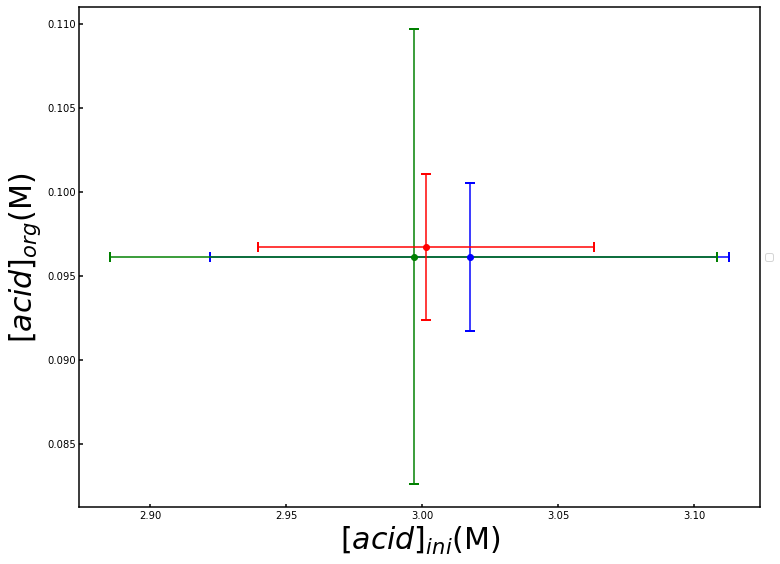

Summary DataFrame:
\begin{tabular}{lrrrrrr}
 & meanmean_x & meanmad_x & meanmean_y & meanmad_y & mean_percent_error_x & mean_percent_error_y \\
0 & 3.005184 & 0.008131 & 0.096313 & 0.000267 & 0.061610 & 1.273620 \\
\end{tabular}

average mad in x: 0.008131136713874257
average mad in y: 0.00026690337839582745
average percentage error in x: 0.061609545536046056
average percentage error in y: 1.2736202944376105


In [52]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())


# Create a summary DataFrame for the means and RMSEs
summary_df = pd.DataFrame({
    'color': colors_vec,
    'mean_x': mean_x_actuals,
    #'dev_x_actuals': dev_x_actuals,
    'mads_x': mads_x,
    'mean_y': mean_y_actuals,
    #'dev_y_actuals': dev_y_actuals,
    'mads_y': mads_y,
    'sequence': sequence,
    #'mean_predicted': means
    #'rmse': rmses
    'percent_error_x': percent_error_xv,
    'percent_error_y': percent_error_yv
})

# Display the results
print("Summary DataFrame:")
print(summary_df.style.to_latex())


#print("\nDeviations DataFrame:")
#print(deviation_df)


fig, axii = plt.subplots()



# Plotting the data
for g,d in summary_df.groupby('color'):
    #axii.errorbar(d['mean_x_actuals'], d['mean_y_actuals'], yerr=10*d['dev_y_actuals'],xerr=10*d['dev_x_actuals'], 
    #        capsize=5, capthick=2, marker='o', linestyle='', color=g)
    axii.errorbar(d['mean_x'], d['mean_y'], yerr=10*d['mads_y'],xerr=10*d['mads_x'], 
            capsize=5, capthick=2, marker='o', linestyle='', color=g)
    
    #average dev_x and dev_y
    print('g',g)
    #print('d',d)
    #print('average std in x:',d['dev_x_actuals'].mean())
    #print('average std in y:',d['dev_y_actuals'].mean())
    #print('d madsx:',d['mads_x'])
    print('average mad in x:',d['mads_x'].mean())
    print('average mad in y:',d['mads_y'].mean())
    
    print('average percent error in x:',d['percent_error_x'].mean())
    print('average percent error in y:',d['percent_error_y'].mean())
    
    
    
    
axii.set_xlabel(r'$[acid]_{ini}$(M)', fontsize='30')
axii.set_ylabel(r'$[acid]_{org}$(M)', fontsize='30')
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
#axii.legend().set_visible(False)
fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()



meanmean_x=[]
meanmean_y=[]
meanstd_x=[]
meanstd_y=[]
meanmad_x=[]
meanmad_y=[]
meanperror_x = []
meanperror_y = []


for g,d in summary_df.groupby('sequence'):
    #print('g',g)
    #print('d',d)
    meanmean_x.append(d['mean_x'].mean())
    meanstd_x.append(d['mean_x'].std())
    meanmad_x.append(sum(abs(x - d['mean_x'].mean()) for x in d['mean_x']) / len(d['mean_x']))
    meanperror_x.append(sum(abs(x - d['percent_error_x'].mean()) for x in d['percent_error_x']) / len(d['percent_error_x']))
    
    meanmean_y.append(d['mean_y'].mean())
    meanstd_y.append(d['mean_y'].std())
    meanmad_y.append(sum(abs(x - d['mean_y'].mean()) for x in d['mean_y']) / len(d['mean_y']))
    meanperror_y.append(sum(abs(x - d['percent_error_y'].mean()) for x in d['percent_error_y']) / len(d['percent_error_y']))

    

# Create a summary DataFrame for the means and RMSEs
summary_summary_df = pd.DataFrame({
    
    'meanmean_x': meanmean_x,
    #'meanstd_x' : meanstd_x,
    'meanmad_x' : meanmad_x,
    'meanmean_y': meanmean_y,
    #'meanstd_y' : meanstd_y,
    'meanmad_y' : meanmad_y,
    #'sequence:': sequence
    #'mean_predicted': means
    #'rmse': rmses
    'mean_percent_error_x':meanperror_x,
    'mean_percent_error_y':meanperror_y
})

# Display the results
print("Summary DataFrame:")
print(summary_summary_df.style.to_latex())

#print('average std in x:',summary_summary_df['meanstd_x'].mean())
#print('average std in y:',summary_summary_df['meanstd_y'].mean())
print('average mad in x:',summary_summary_df['meanmad_x'].mean())
print('average mad in y:',summary_summary_df['meanmad_y'].mean())
print('average percentage error in x:',summary_summary_df['mean_percent_error_x'].mean())
print('average percentage error in y:',summary_summary_df['mean_percent_error_y'].mean())




#name = 'yaita2004'
#fig.savefig('./PDFimages/digitizer/'+name+'singlePointspread1.pdf', dpi=300)